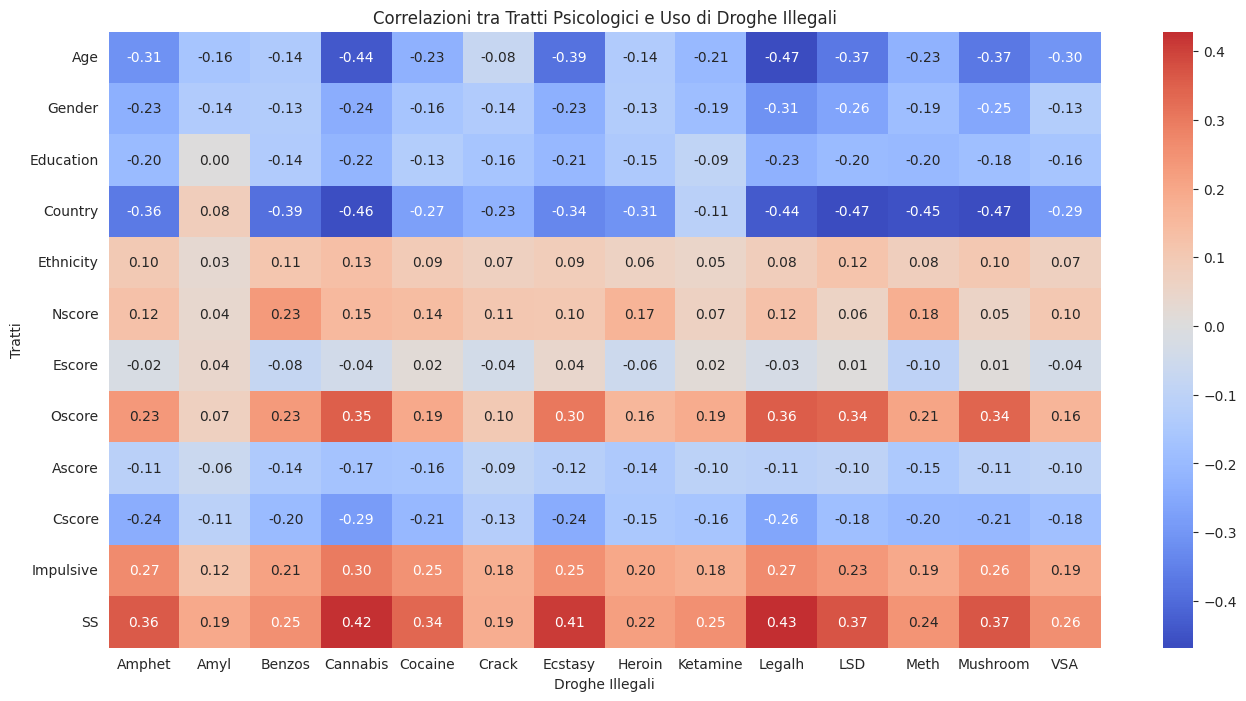

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

pd.set_option('future.no_silent_downcasting', True) # pulizia warning non necessario di pandas

df = pd.read_csv("drug_consumption.data", header=None)
df.head()

columns = [
    "ID", "Age", "Gender", "Education", "Country", "Ethnicity",
    "Nscore", "Escore", "Oscore", "Ascore", "Cscore",
    "Impulsive", "SS",
    "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis",
    "Choc", "Cocaine", "Crack", "Ecstasy", "Heroin", "Ketamine",
    "Legalh", "LSD", "Meth", "Mushroom", "Nicotine",
    "Semer", "VSA"
]

df.columns = columns
df = df.drop(columns=["ID"])  # ID non utile
df.head()

X = df.iloc[:, :12]        # prime 12 colonne = tratti psicologici + demografia
targets = df.iloc[:, 12:]  # droghe

targets_binary = targets.astype(str).replace({
    'CL0': 0,
    'CL1': 0,
    'CL2': 1,
    'CL3': 1,
    'CL4': 1,
    'CL5': 1,
    'CL6': 1
})


legal_drugs = ['Alcohol', 'Caff', 'Choc', 'Nicotine']

illegal_drugs = [
    col for col in targets_binary.columns
    if col not in legal_drugs and col != 'Semer'
]

data_combined = pd.concat([X, targets_binary[illegal_drugs]], axis=1)

corr_matrix = data_combined.corr(method='spearman')
corr_subset = corr_matrix.loc[X.columns, illegal_drugs]

plt.figure(figsize=(16, 8))
sns.heatmap(corr_subset, annot=True, fmt=".2f",
            cmap='coolwarm', center=0)
plt.title("Correlazioni tra Tratti Psicologici e Uso di Droghe Illegali")
plt.xlabel("Droghe Illegali")
plt.ylabel("Tratti")
plt.show()
